In [1]:
R.Version()$version.string

[1] "R version 4.1.0 (2021-05-18)"

In [2]:
library("DESeq2")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [3]:
ipsc_rna <- read.table("../../data/iPSC_DESeq_JUL2015_all_merged_ensemble_DataLevel3.csv",header=TRUE,row.names=1,sep=",",check.names = FALSE)
condition_map <- read.table("../../nbdata/iPSC_id_condition_map.tsv",header=TRUE,row.names=1,sep="\t",check.names=FALSE)
ipsc_rna <- ipsc_rna[, rownames(condition_map)] # Reorder columns of counts

In [4]:
dds <- DESeqDataSetFromMatrix(countData = ipsc_rna,
                              colData = condition_map,
                              design = ~ Condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [5]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

In [6]:
dds <- DESeq(dds)
res <- results(dds,contrast=c("Condition","ALS","CTR"))
resOrdered <- res[order(res$pvalue),]

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 27 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [7]:
resOrdered

log2 fold change (MLE): Condition ALS vs CTR 
Wald test p-value: Condition ALS vs CTR 
DataFrame with 31098 rows and 6 columns
                 baseMean log2FoldChange     lfcSE         stat      pvalue
                <numeric>      <numeric> <numeric>    <numeric>   <numeric>
ENSG00000122507  482.2545      -1.103188 0.0975530    -11.30859 1.18983e-29
ENSG00000100362   38.4101      -1.535439 0.1406389    -10.91760 9.49746e-28
ENSG00000196436   64.9748       3.891810 0.3715225     10.47530 1.12182e-25
ENSG00000166869  114.3750      -1.301314 0.1335567     -9.74353 1.96603e-22
ENSG00000156587  978.3199      -0.549121 0.0567064     -9.68358 3.54107e-22
...                   ...            ...       ...          ...         ...
ENSG00000232912  1.278969   -3.30978e-05  0.679851 -4.86839e-05    0.999961
ENSG00000260973  1.404485    0.00000e+00  3.666292  0.00000e+00    1.000000
ENSG00000203616  0.570581    0.00000e+00  3.666292  0.00000e+00    1.000000
ENSG00000265019  0.787249    0.00000e

In [8]:
write.table(resOrdered, file = "../../nbdata/iPSC_deseq2_condition.tsv",quote=TRUE,sep="\t")

## Visualization

In [9]:
resLFC <- lfcShrink(dds, coef="Condition_CTR_vs_ALS", type="apeglm")
png(file="../../figs/iPSC_deseq2_lfc_counts.png",width=500, height=500)
plotMA(resLFC, ylim=c(-2,2),xlab="",ylab="")
title(
    main='Mean Counts vs. (ALS/CTR) Fold Change for 31098 genes in iPSC',
    xlab='Mean Normalized Counts',
    ylab='Log(Fold Change)',
    cex.lab=1.5, cex.axis=1, cex.main=1.2, cex.sub=1.8
)
dev.off()

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



png 
  2

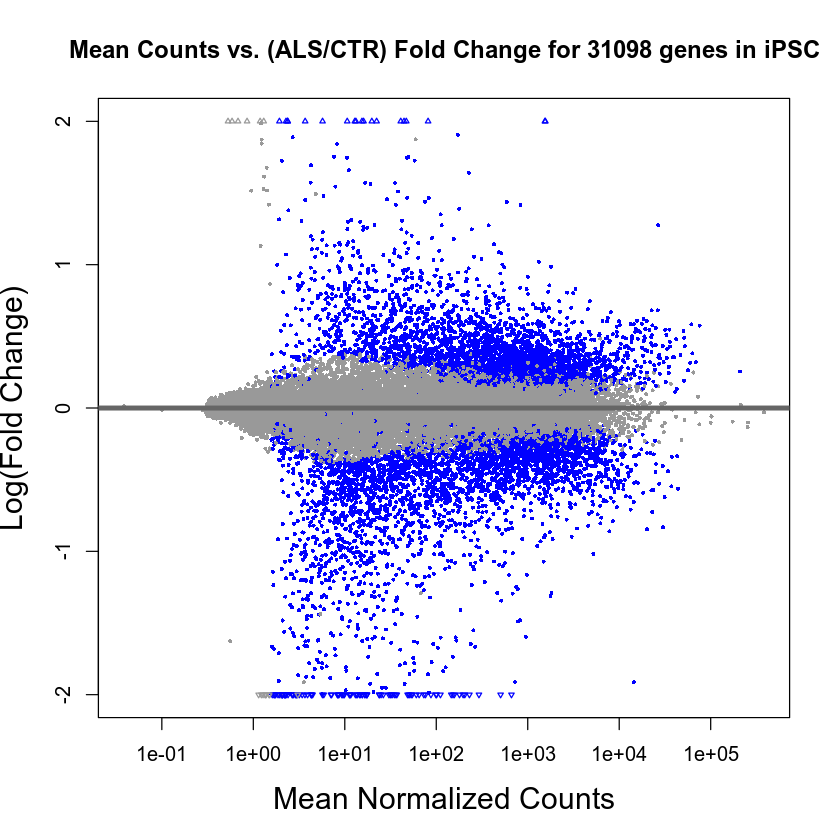

In [13]:
plotMA(resLFC, ylim=c(-2,2),xlab="",ylab="")
title(
    main='Mean Counts vs. (ALS/CTR) Fold Change for 31098 genes in iPSC',
    xlab='Mean Normalized Counts',
    ylab='Log(Fold Change)',
    cex.lab=1.5, cex.axis=1, cex.main=1.2, cex.sub=1.8
)